In [2]:
import pandas as pd
source_data = pd.read_csv('penguins.csv')
source_data

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [3]:
data = source_data.dropna()
data

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [4]:
data['Species'].value_counts()

Species
0    151
1    123
2     68
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


In [6]:
import matplotlib.pyplot as plt

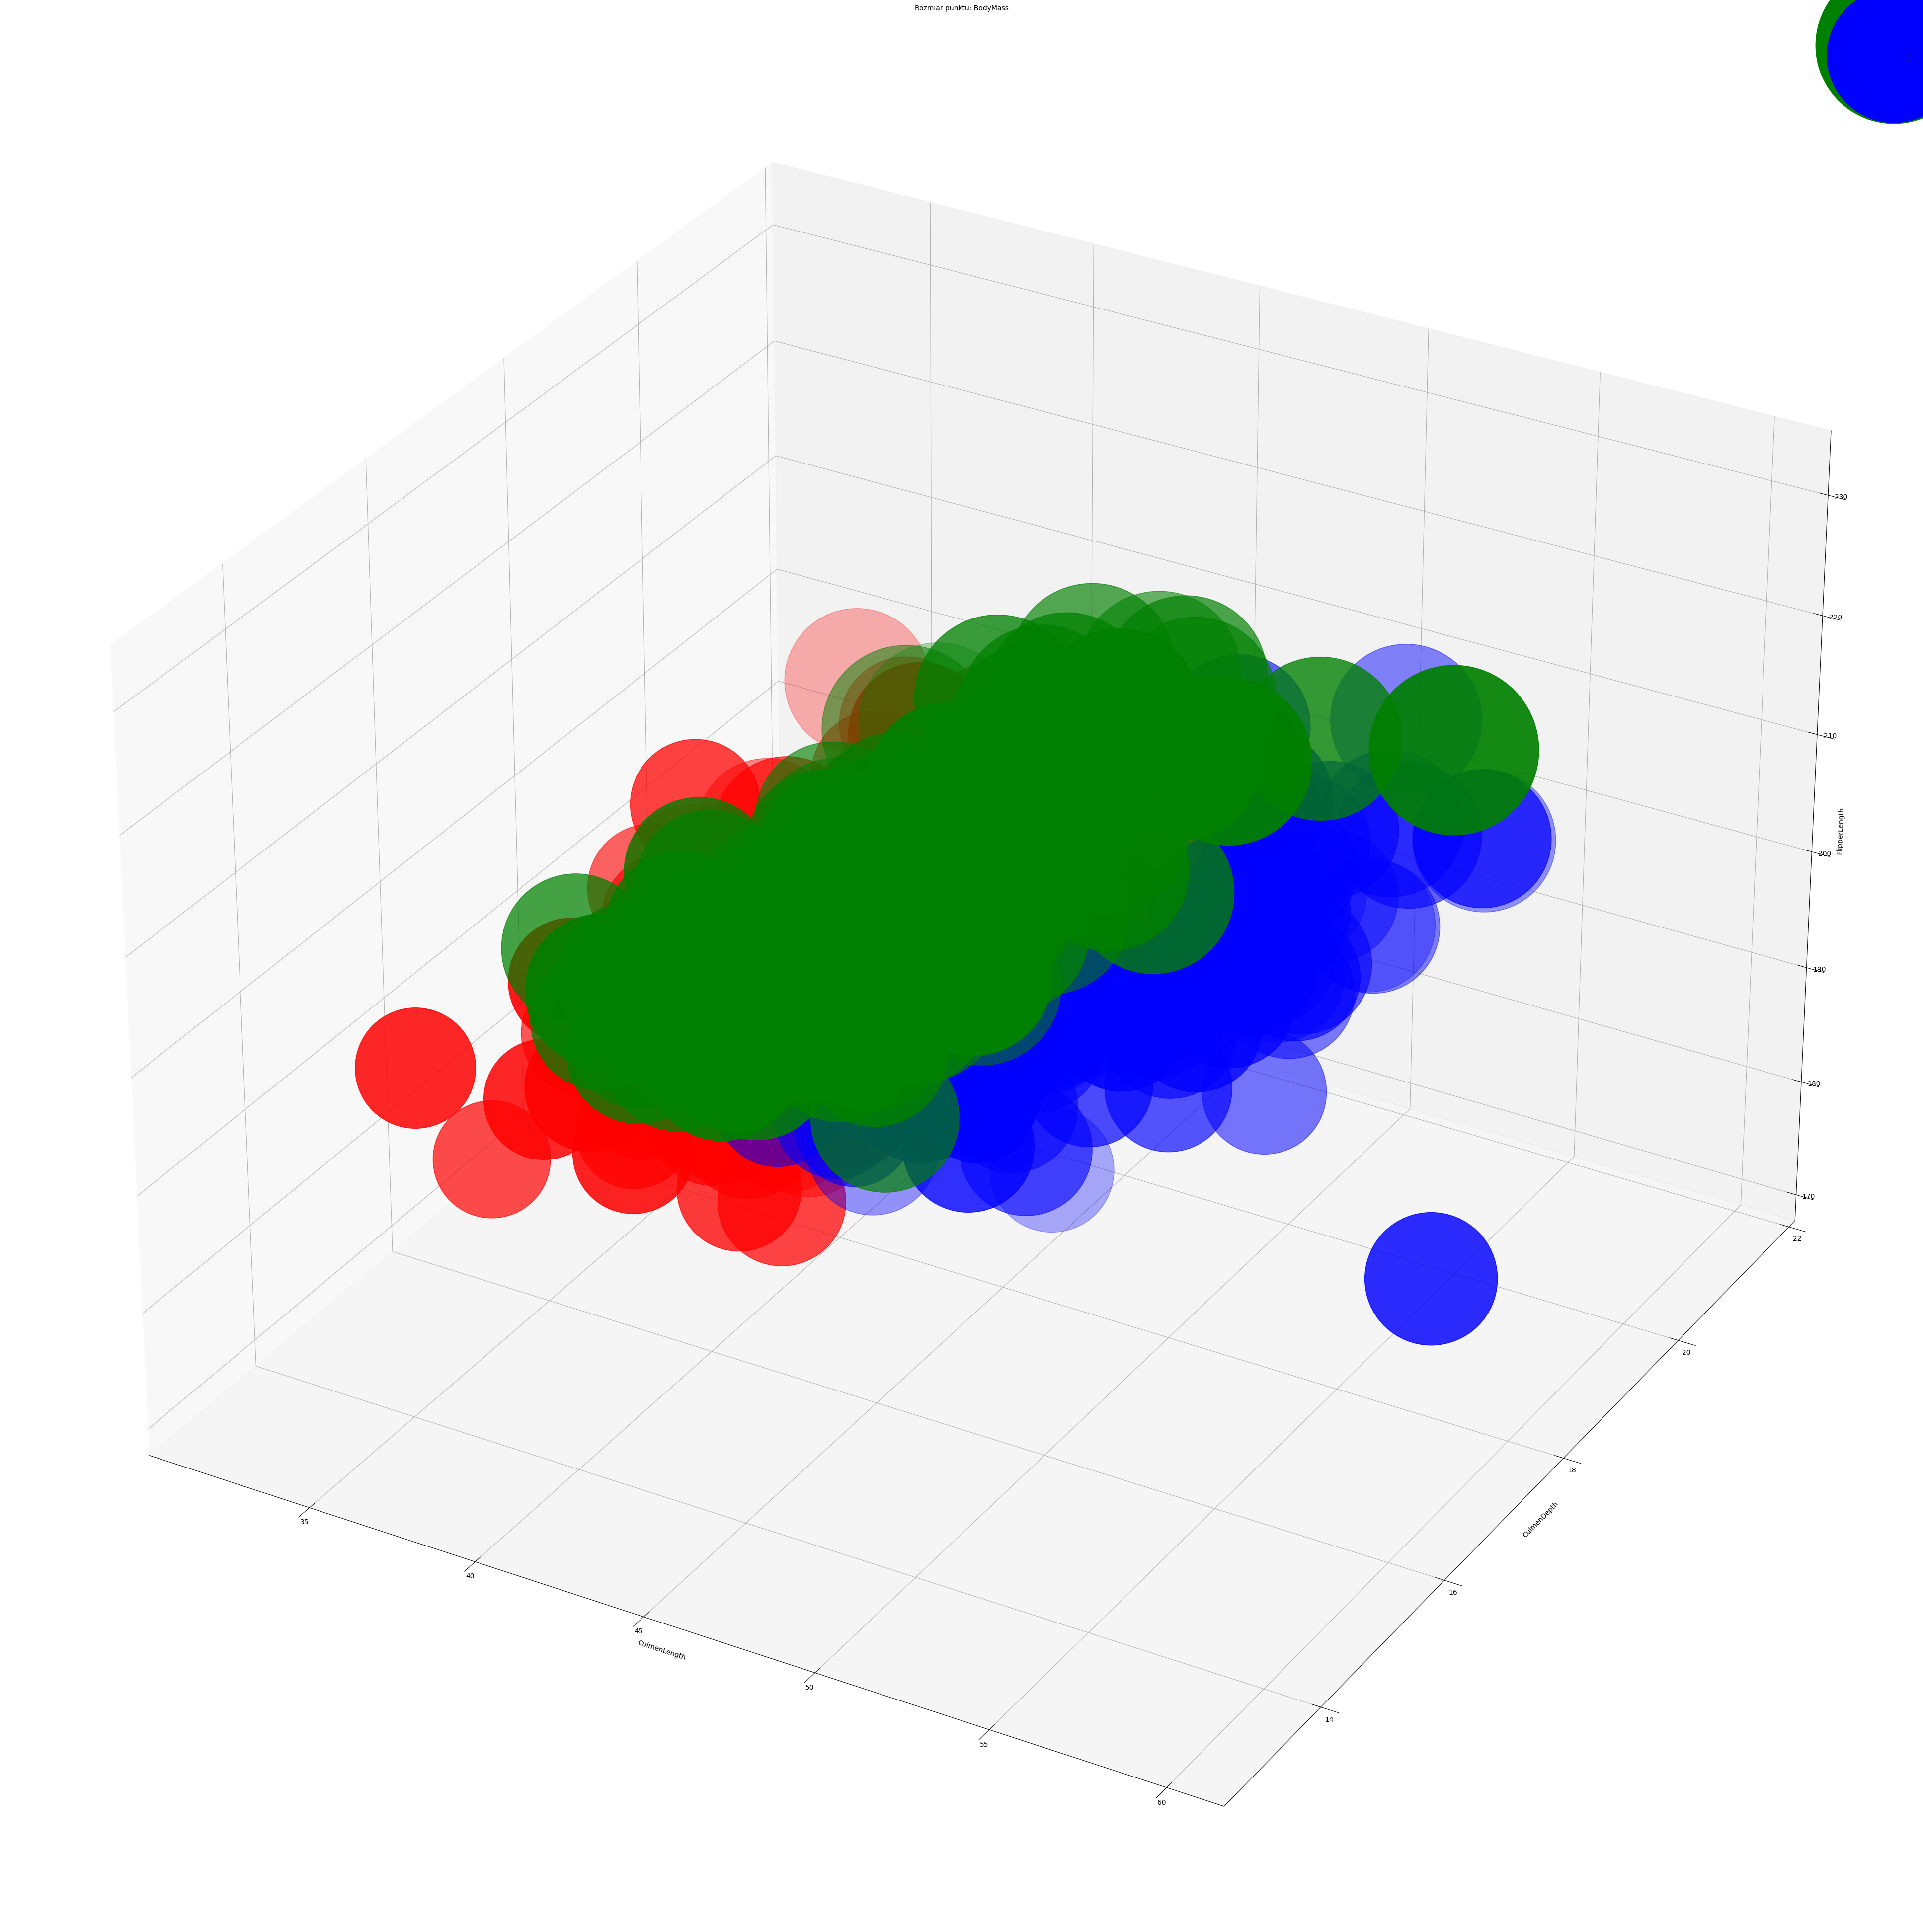

In [7]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=data.loc[data['Species']== 0, 'CulmenLength'],
                 ys=data.loc[data['Species']== 0,'CulmenDepth'],
                 zs=data.loc[data['Species']== 0, 'FlipperLength'],
                 s=data.loc[data['Species']== 0,'BodyMass']*10,
                 c='red', label='0')
img = ax.scatter(xs=data.loc[data['Species']== 1, 'CulmenLength'],
                 ys=data.loc[data['Species']== 1,'CulmenDepth'],
                 zs=data.loc[data['Species']== 1, 'FlipperLength'],
                 s=data.loc[data['Species']== 1,'BodyMass']*10,
                 c='green', label='1')
img = ax.scatter(xs=data.loc[data['Species']== 2, 'CulmenLength'],
                 ys=data.loc[data['Species']== 2,'CulmenDepth'],
                 zs=data.loc[data['Species']== 2, 'FlipperLength'],
                 s=data.loc[data['Species']== 2,'BodyMass']*10,
                 c='blue', label='2')
ax.set_xlabel(xlabel='CulmenLength', size=10)
ax.set_ylabel(ylabel='CulmenDepth', size=10)
ax.set_zlabel(zlabel='FlipperLength', size=10)
ax.set_title('Rozmiar punktu: BodyMass', size=10)
plt.legend(title='Species')
plt.show()

In [8]:
import seaborn as sns

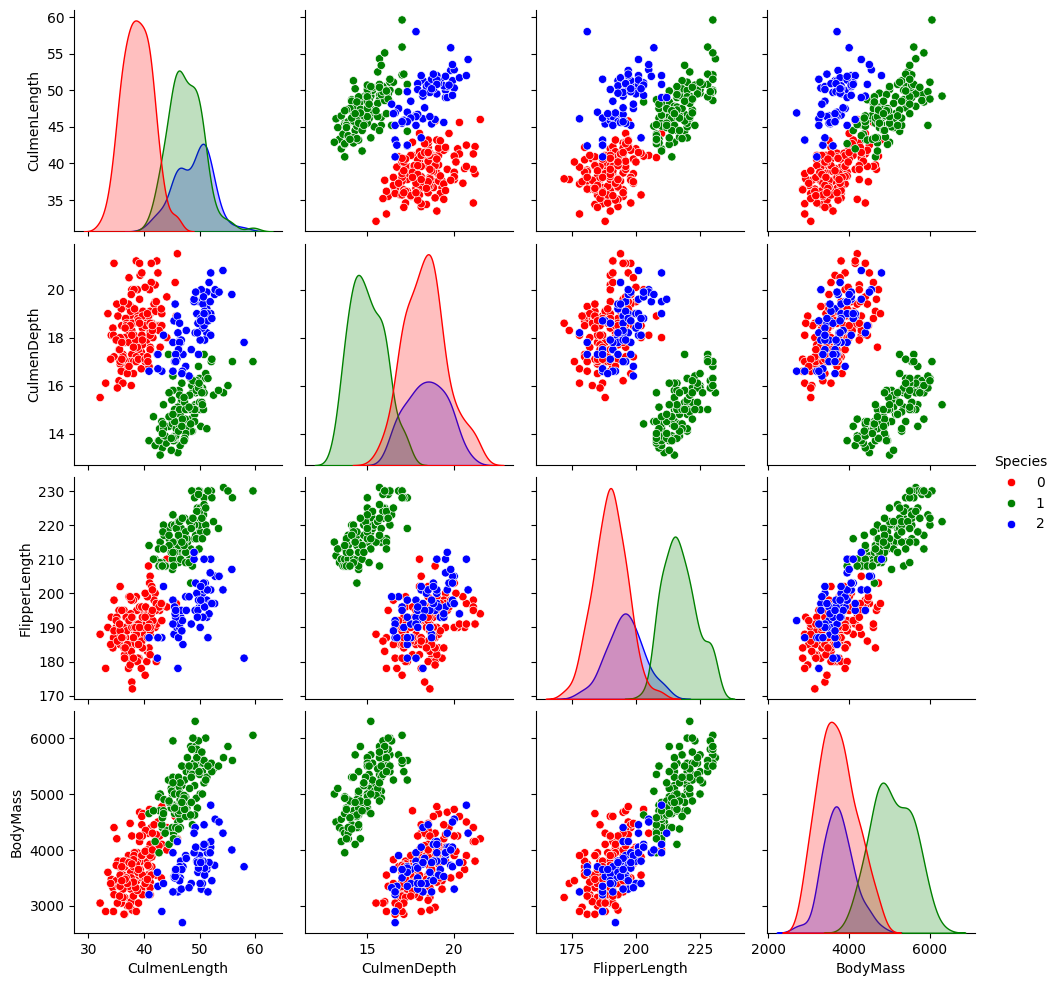

In [9]:
sns.pairplot(data,
             hue='Species',
             palette={0: 'red', 1: 'green', 2: 'blue'})
plt.show()

In [10]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = data[features], data[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 342, dtype: int64

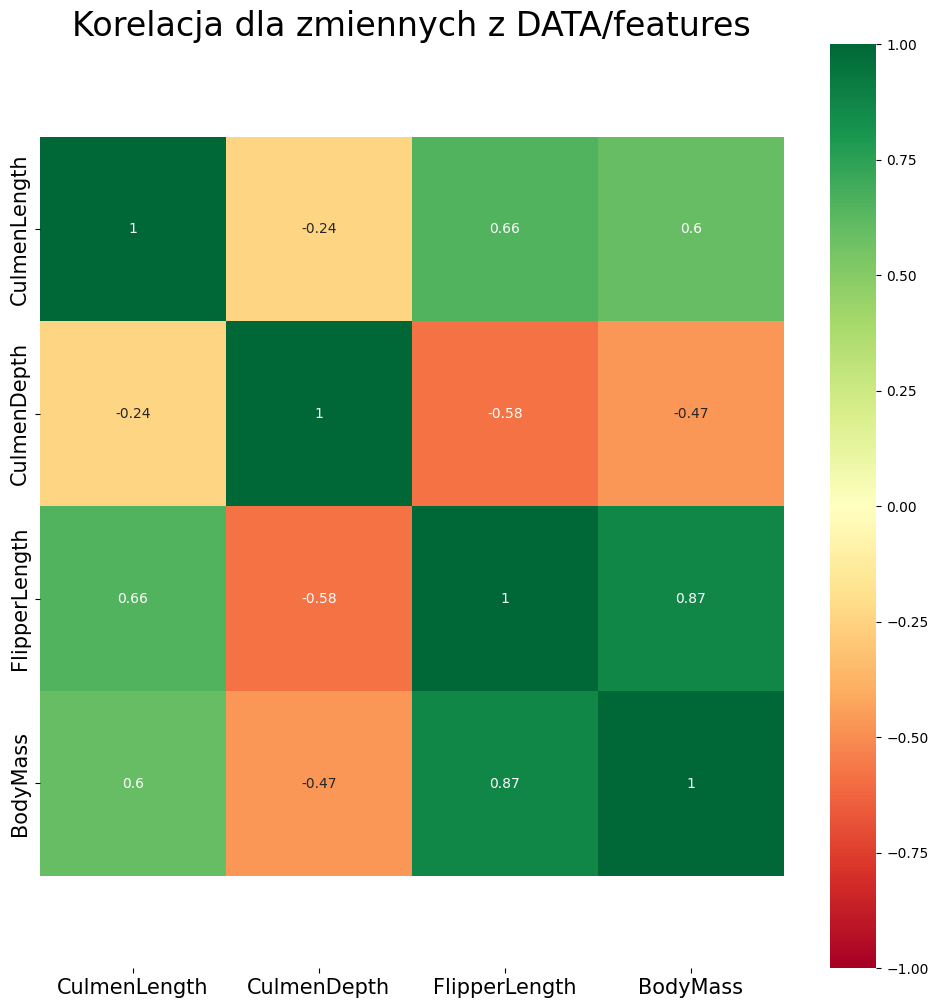

In [11]:
plt.figure(figsize=(12, 12))

# Obliczenie macierzy korelacji na danych X
corr_matrix = X.corr()

ax = sns.heatmap(corr_matrix,
                 xticklabels=corr_matrix.columns,
                 yticklabels=corr_matrix.columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax=1)

plt.title('Korelacja dla zmiennych z DATA/features', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_data = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_data.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Species'},
                  inplace=True)
train_data[['PC1', 'PC2','PC3','PC4']] = train_data[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_data.corr()

,PC1,PC2,PC3,PC4,Species
PC1,1.000000e+00,-5.772589e-17,-4.698512e-16,9.912933e-16,0.426933
PC2,-5.772589e-17,1.000000e+00,-6.765703e-16,-3.153274e-15,0.365677
PC3,-4.698512e-16,-6.765703e-16,1.000000e+00,7.654100e-16,-0.626119
PC4,9.912933e-16,-3.153274e-15,7.654100e-16,1.000000e+00,0.028837
Species,4.269326e-01,3.656773e-01,-6.261193e-01,2.883655e-02,1.000000


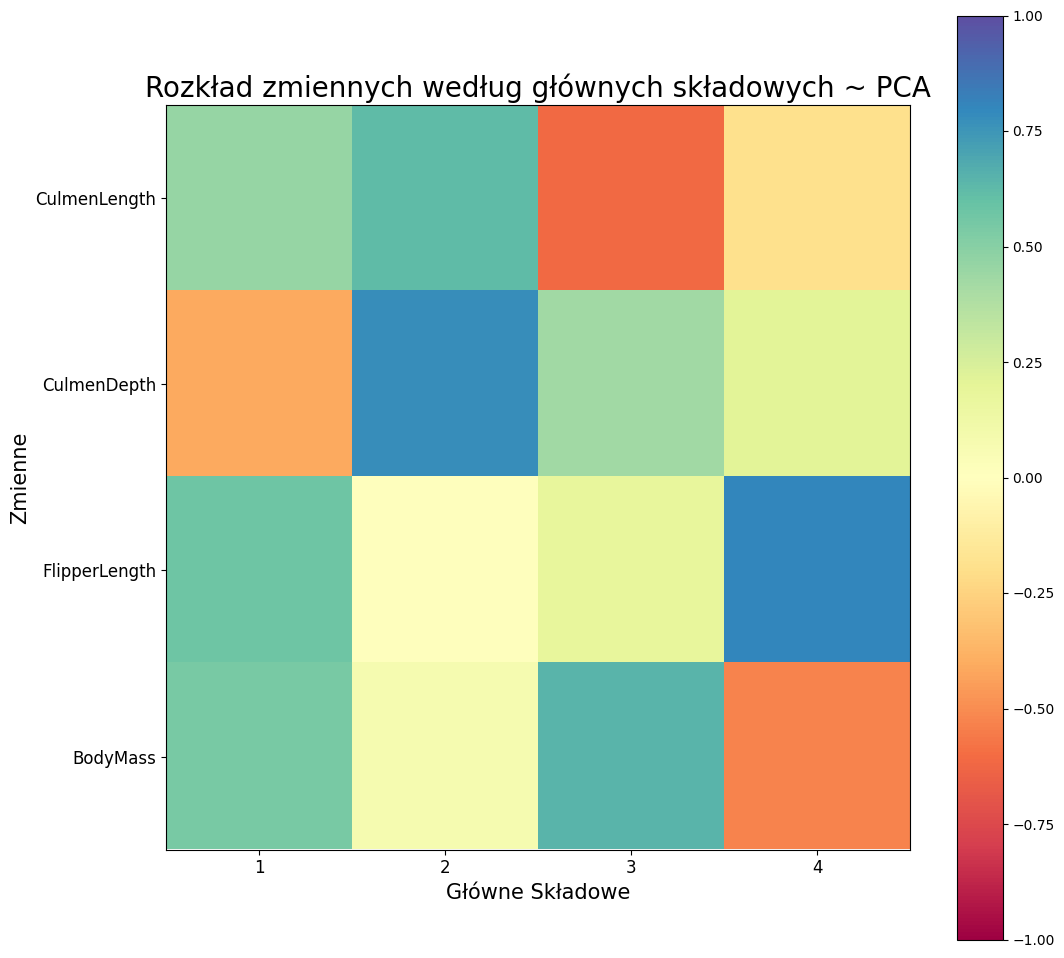

In [13]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

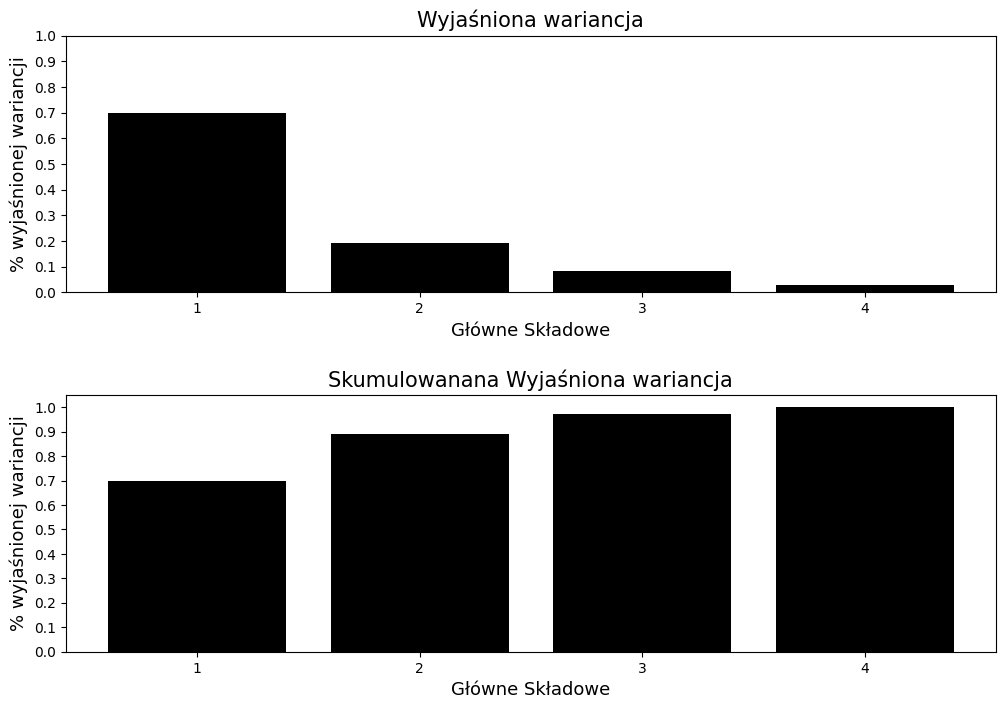

Główna składowa: 1, Wyjaśniona wariancja: 0.69963, Skumulowana Wyjaśniona wariancja: 0.69963
Główna składowa: 2, Wyjaśniona wariancja: 0.19098, Skumulowana Wyjaśniona wariancja: 0.89061
Główna składowa: 3, Wyjaśniona wariancja: 0.08227, Skumulowana Wyjaśniona wariancja: 0.97288
Główna składowa: 4, Wyjaśniona wariancja: 0.02712, Skumulowana Wyjaśniona wariancja: 1.0


In [14]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

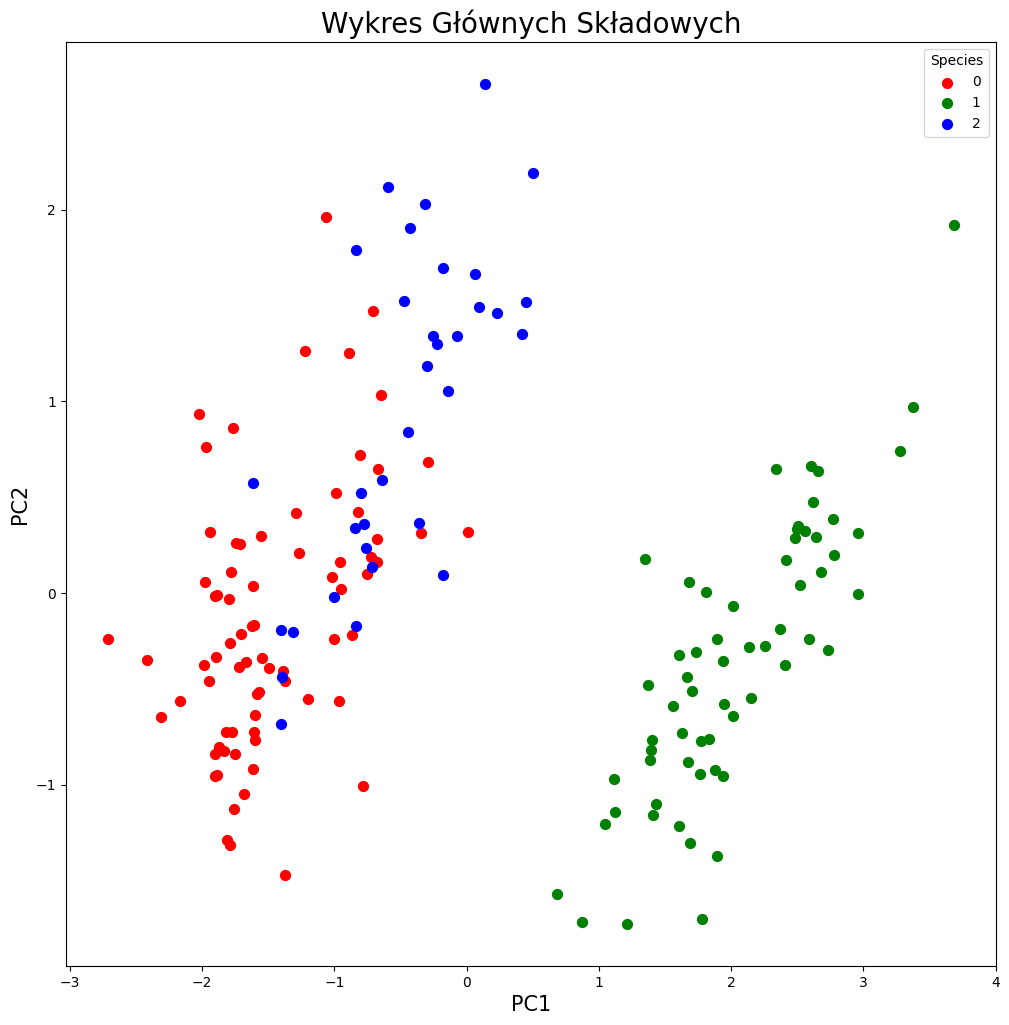

In [15]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_data.loc[train_data['Species']== 0, 'PC1'],
            y=train_data.loc[train_data['Species']== 0,'PC2'],
            c='red', label='0', s=50)
plt.scatter(x=train_data.loc[train_data['Species']== 1, 'PC1'],
            y=train_data.loc[train_data['Species']== 1,'PC2'],
            c='green', label='1', s=50)
plt.scatter(x=train_data.loc[train_data['Species']== 2, 'PC1'],
            y=train_data.loc[train_data['Species']== 2,'PC2'],
            c='blue', label='2', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

In [16]:
pip install prettytable

**PCA - regresja**

In [17]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9942   |             270334             |
|   Skalowane dane  |    1.0     |             15625              |
|        4 PC       |    1.0     |             15656              |
|        3 PC       |   0.9942   |               0                |
|        2 PC       |   0.9181   |             15611              |
|        1 PC       |   0.9298   |               0                |
+-------------------+------------+--------------------------------+


**PCA - klasyfikacja**

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
import datetime

# Przygotowanie danych skalowanych
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Funkcja do trenowania i sprawdzania dokładności modelu
def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = RandomForestClassifier(n_estimators=1000, max_depth=5, min_samples_leaf=3)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

# Przygotowanie tabeli do wyników
results = PrettyTable(['Model', 'Dokładność', 'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieskalowanych danych
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na skalowanych danych
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Przeprowadzamy PCA (1, 2, 3, 4 główne składowe)
pca_1 = PCA(n_components=1)
X_train_pca_1 = pca_1.fit_transform(X_train_scaler)
X_test_pca_1 = pca_1.transform(X_test_scaler)

pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train_scaler)
X_test_pca_2 = pca_2.transform(X_test_scaler)

pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train_scaler)
X_test_pca_3 = pca_3.transform(X_test_scaler)

pca_4 = PCA(n_components=4)
X_train_pca_4 = pca_4.fit_transform(X_train_scaler)
X_test_pca_4 = pca_4.transform(X_test_scaler)

# Trenowanie modelu na 1 Głównej Składowej
PC1_data = train_and_check(X_train_pca_1, X_test_pca_1, y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])

# Trenowanie modelu na 2 Głównej Składowej
PC2_data = train_and_check(X_train_pca_2, X_test_pca_2, y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na 3 Głównej Składowej
PC3_data = train_and_check(X_train_pca_3, X_test_pca_3, y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na 4 Głównej Składowej
PC4_data = train_and_check(X_train_pca_4, X_test_pca_4, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Wyświetlanie wyników
print(results)


+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9883   |             30706              |
|   Skalowane dane  |   0.9883   |             703587             |
|        1 PC       |   0.9123   |             246650             |
|        2 PC       |   0.9064   |             362081             |
|        3 PC       |   0.9825   |             30939              |
|        4 PC       |   0.9825   |             93470              |
+-------------------+------------+--------------------------------+
